<a href="https://colab.research.google.com/github/pfbrune/GrokkingML/blob/main/ch3_hyderabad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/pfbrune/GrokkingML/main/Hyderabad.csv'
df = pd.read_csv(data_url)

In [3]:
df.head(3)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = df['Price']
df2 = df.copy()
df2.drop(columns='Price', inplace=True)
print(df2.columns)
features_lst = list(df2.columns)
num_features = len(features_lst)
print('\nNumber of features = {}'.format(num_features))

Index(['Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object')

Number of features = 39


In [5]:
#find and exclude non-numeric data types
non_num_cols = df2.select_dtypes(include=['object']).columns.to_list()
df3 = df2.copy()
df3.drop(columns=non_num_cols, inplace=True)
num_num_features = num_features - len(non_num_cols)
num_features_lst = df3.columns.to_list()

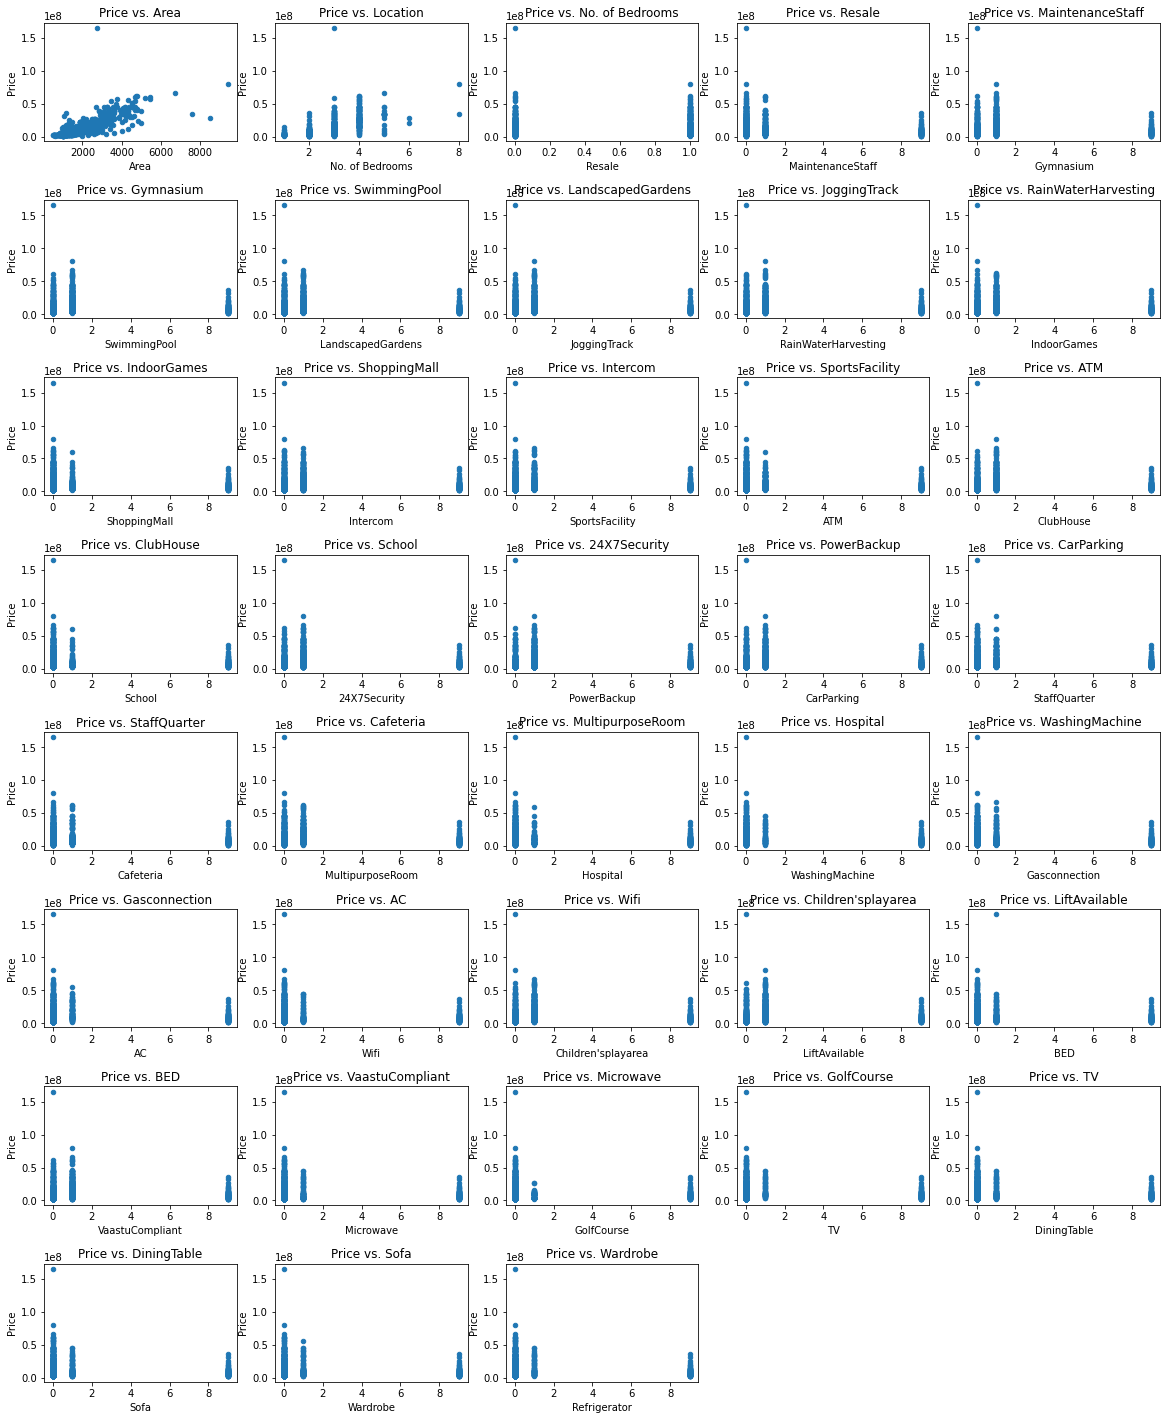

In [6]:
#plot numerical features
plot_cols = 5
plot_rows = np.ceil(num_num_features / plot_cols)
plt.figure(figsize=(plot_cols*4,1+plot_rows*3))
plt.subplots_adjust(hspace=0.5,wspace=0.2)

for i in range(num_num_features):
  ax = plt.subplot(plot_rows, plot_cols, i+1)
  df_plt = pd.concat([df3[num_features_lst[i]],Y],axis=1)
  df_plt.plot.scatter(x=num_features_lst[i], y='Price', ax=ax)

  ax.set_title('Price vs. '+features_lst[i])